# **OPERADORES DIFERENCIALES EN $\mathbb{R}^3$:**

**Este notebook consiste en determinar el gradiente, la divergencia y el rotacional de las dos siguientes funciones, $f$ y $g$ definidas como sigue:**

$f: \mathbb{R}^3 \rightarrow \mathbb{R}$

$\quad \vec{r}=(x,y,z) \rightarrow e^{(-x^2-y^4)}$

$g: \mathbb{R}^3 \rightarrow \mathbb{R}^3$

$\quad \vec{r}=(x,y,z) \rightarrow \frac{\vec{r}}{\lVert \vec{r} \rVert}=(\frac{x}{\sqrt{x^2+y^2+z^2}}, \frac{y}{\sqrt{x^2+y^2+z^2}}, \frac{z}{\sqrt{x^2+y^2+z^2}})$ 

Tal vez sería útil denotar a $g$ como $g(\vec{r})=\vec{g}(\vec{r})$, puesto que estamos hablando de un campo vectorial y ahorrarnos confusiones con $f$ que es un campo escalar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Definimos las funciones:**

In [2]:
def f(r):
    return np.exp((-r[0]**2)-(r[1]**4)) #f tiene 3 componentes sobre los que actúa, x,y,z, indexados como 0,1,2 en el arreglo
                                        #correspondiente al vector.

def g(r):
    return r / np.linalg.norm(r)

**Visualizamos gráficamente la función escalar:**

Text(0.5, 0.92, 'Gráfica de $f(x,y,z)=\\exp(-x^2-y^4)$')

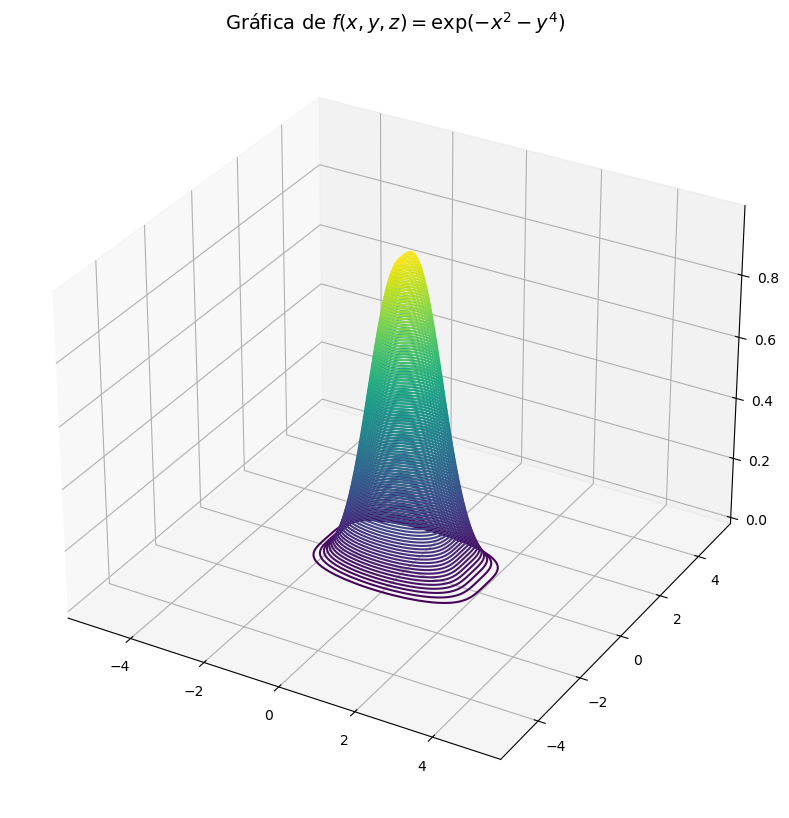

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

x,y= np.meshgrid(np.linspace(-5,5,200),np.linspace(-5,5,200))
z= f(np.array([x,y]))

plotproj= plt.axes(projection='3d')
plotproj.contour3D(x,y,z,100)
plt.title(r"Gráfica de $f(x,y,z)=\exp(-x^2-y^4)$", fontsize=14)

**Visualizamos ahora el campo vectorial:**

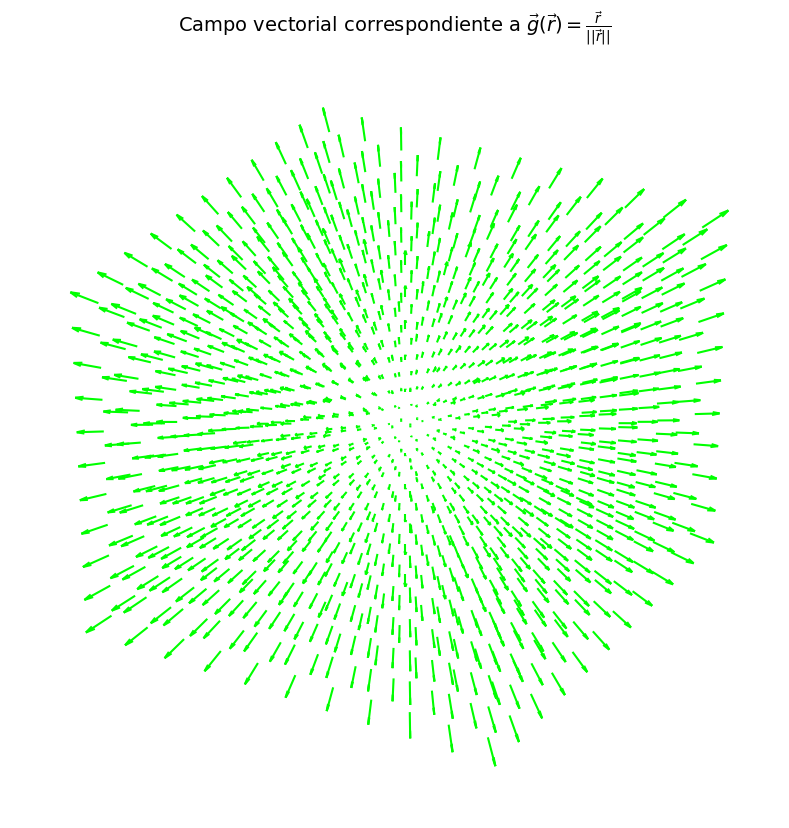

In [30]:
x, y, z=np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
valores_g=g(np.array([x,y,z]))

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)
plt.title(r'Campo vectorial correspondiente a $\vec{g}(\vec{r})=\frac{\vec{r}}{||\vec{r}||}$',fontsize=14)
escala=7
arrowplot.quiver(x, y, z, valores_g[0]*escala,valores_g[1]*escala,valores_g[2]*escala, color="lime")

**Para quedarnos en el área del cálculo vectorial, vamos a decir lo que convenientemente nos dicen en clases de este tema, que el gradiente es un operador que está definido únicamente para funciones escalares, es decir:**

**Para $f: \mathbb{R}^n \rightarrow \mathbb{R}$, se define $\nabla f:\mathbb{R}^n \rightarrow \mathbb{R}^n $. Así nos hacemos de la vista gorda con términos más complejos de cálculo tensorial.**

**¿Recordamos la clásica definición de límite para funciones del tipo $f: \mathbb{R} \rightarrow \mathbb{R}$?:**

**$\lim_{h \to 0} \frac{f(x+h)-f(x-h)}{2h}$ (hay un par de expresiones algebráicas equivalentes que normalmente se manejan en la literatura, por si hace ruido que se use esta expresión, es la misma).**

**Pues la extendemos a $f: \mathbb{R}^n \rightarrow \mathbb{R}$ para abordar las derivadas parciales asociadas al gradiente mediante la definición de límite:**

**$\frac{\partial f(x_1,\dots,x_n)}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, x_2, \dots, x_i + h, \dots, x_n) - f(x_1, x_2, \dots, x_i -h, \dots, x_n)}{2h}$, y ahora sí, estamos listos para el código:**

In [31]:
def gradiente(f,r,h):
    x,y,z = r
    parcialx = ( f(np.array([x+h,y,z])) - f(np.array([x-h,y,z]))) / (2*h)
    parcialy = ( f(np.array([x,y+h,z])) - f(np.array([x,y-h,z]))) / (2*h)
    parcialz = ( f(np.array([x,y,z+h])) - f(np.array([x,y,z-h]))) / (2*h)
    return np.array([parcialx, parcialy, parcialz])

**Definimos el vector $\vec{r}=(x,y,z)=(0.5,-1.2,-8)$:**

In [35]:
r = np.array([0.5,-1.2,-8.])
h = 0.0001

gradiente(f,r,h)

array([-0.09792044,  0.67682606,  0.        ])

**Entonces obtenemos analíticamente que:**

$\nabla f(\vec{r})=f(x,y,z)= (\frac{\partial f(x,y,z)}{\partial x}, \frac{\partial f(x,y,z)}{\partial y}, \frac{\partial f(x,y,z)}{\partial z})=(-2x\exp(-x^2-y^4), -4y^3\exp(-x^2-y^4), 0)=(-0.09792044,  0.67682606,  0)$

**El procedimiento es análogo para la divergencia, la cuál vamos a definir para funciones vectoriales:**

In [36]:
def divergencia(g,r,h):
    x,y,z=r
    dgxdx=(g(np.array([x+h,y,z]))[0] - g(np.array([x-h,y,z]))[0]) / (2*h)
    dgydy=(g(np.array([x,y+h,z]))[1] - g(np.array([x,y-h,z]))[1]) / (2*h)
    dgzdz=(g(np.array([x,y,z+h]))[2] - g(np.array([x,y,z-h]))[2]) / (2*h)
    return dgxdx + dgydy + dgzdz

**Evaluamos $g$ en el mismo punto $\vec{r}$ definido anteriormente y calculamos la divergencia:**

In [37]:
divergencia(g,r,h)

0.24676318364020428

**Analíticamente hallamos que:**

$\nabla \cdot \vec{g}(\vec{r}=(x,y,z))=\frac{\partial \vec{g}}{\partial x}+\frac{\partial \vec{g}}{\partial y}+\frac{\partial \vec{g}}{\partial z}=\frac{2}{\lVert \vec{r} \rVert} \approx 0.247$

**De igual manera, para el rotacional con respecto a $\vec{g}$ evaluada en el mismo $\vec{r}$:**

In [38]:
def curl(g,r,h):
    x,y,z=r
    dgxdy=(g(np.array([x,y+h,z]))[0] - g(np.array([x,y-h,z]))[0]) / (2*h)
    dgxdz=(g(np.array([x,y,z+h]))[0] - g(np.array([x,y,z-h]))[0]) / (2*h)
    dgydx=(g(np.array([x+h,y,z]))[1] - g(np.array([x-h,y,z]))[1]) / (2*h)
    dgydz=(g(np.array([x,y,z+h]))[1] - g(np.array([x,y,z-h]))[1]) / (2*h)
    dgzdx=(g(np.array([x+h,y,z]))[2] - g(np.array([x-h,y,z]))[2]) / (2*h)
    dgzdy=(g(np.array([x,y+h,z]))[2] - g(np.array([x,y-h,z]))[2]) / (2*h)
    return np.array([ dgzdy-dgydz, dgxdz-dgzdx, dgydx-dgxdy ])

In [39]:
curl(g,r,h)

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])

**Notemos que las cantidades son extremadamente pequeñas, en este caso numéricamente no pueden ser cero en Python, empezando con que $h$ no puede ser cero, pero analíticamente podemos aproximar cada entrada como cero:**

$\nabla \times \vec{g}(\vec{r}) = \left( \frac{\partial g_z}{\partial y} - \frac{\partial g_y}{\partial z} \right) \hat{x} + \left( \frac{\partial g_x}{\partial z} - \frac{\partial g_z}{\partial x} \right) \hat{y} + \left( \frac{\partial g_y}{\partial x} - \frac{\partial g_x}{\partial y} \right) \hat{z}=\vec{0}$
